In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import soundfile


In [ ]:
emotions = {
    0: "calm",
    1: "happy",
    2: "neutral",
    3: "sad",
    4: "angry",
    5: "fearful",
    6: "disgust",
    7: "surprised"
}

In [ ]:
def extract_feature(file_name, mfcc=True, chroma=True, mel=True, spectral_contrast=True, tonnetz=True):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel_spec = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel_spec))
        if spectral_contrast:
            spectral_contrast_features = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, spectral_contrast_features))
        if tonnetz:
            tonnetz_features = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, tonnetz_features))
    return result


In [ ]:
import os
import numpy as np
import pandas as pd

# Define the function to load the dataset
def load_dataset(dataset_path, emotion_mapping):
    features = []  # Initialize features list
    labels = []

    # Traverse through each actor's directory
    print("Looking for actor directories in:", dataset_path)
    for actor_folder in os.listdir(dataset_path):
        actor_path = os.path.join(dataset_path, actor_folder)

        # Print the path being checked
        print("Checking actor path:", actor_path)

        # Skip if it's not a directory
        if not os.path.isdir(actor_path):
            print(f"Skipping {actor_path} (not a directory)")
            continue

        # Print contents of the actor folder for debugging
        print(f"Contents of {actor_path}:", os.listdir(actor_path))

        # Iterate through each audio file in the actor's directory
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_path, file_name)

                # Print the file being processed
                print("Processing file:", file_path)

                # Extract features using the previously defined function
                feature = extract_feature(file_path)  # Call the function correctly

                if feature is not None:
                    features.append(feature)

                    # Extract the emotion label from the filename
                    emotion_code = int(file_name.split('-')[2])
                    labels.append(emotion_mapping[emotion_code])

    return np.array(features), np.array(labels)

# Define the correct path to your dataset
dataset_path = r'C:\SEM_5\ML\ML_LAB\LAB_7\Student\Student\speech-emotion-recognition-ravdess-data'

# Load the dataset
emotion_mapping = {
    1: "Neutral",
    2: "Calm",
    3: "Happy",
    4: "Sad",
    5: "Angry",
    6: "Fearful",
    7: "Disgust",
    8: "Surprised"
}

features, labels = load_dataset(dataset_path, emotion_mapping)

# Convert to DataFrame for easy handling (optional)
df = pd.DataFrame(features)
df['label'] = labels

# Display the first few rows of the DataFrame
print(df.head())


Looking for actor directories in: C:\SEM_5\ML\ML_LAB\LAB_7\Student\Student\speech-emotion-recognition-ravdess-data
Checking actor path: C:\SEM_5\ML\ML_LAB\LAB_7\Student\Student\speech-emotion-recognition-ravdess-data\Actor_01
Contents of C:\SEM_5\ML\ML_LAB\LAB_7\Student\Student\speech-emotion-recognition-ravdess-data\Actor_01: ['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav'

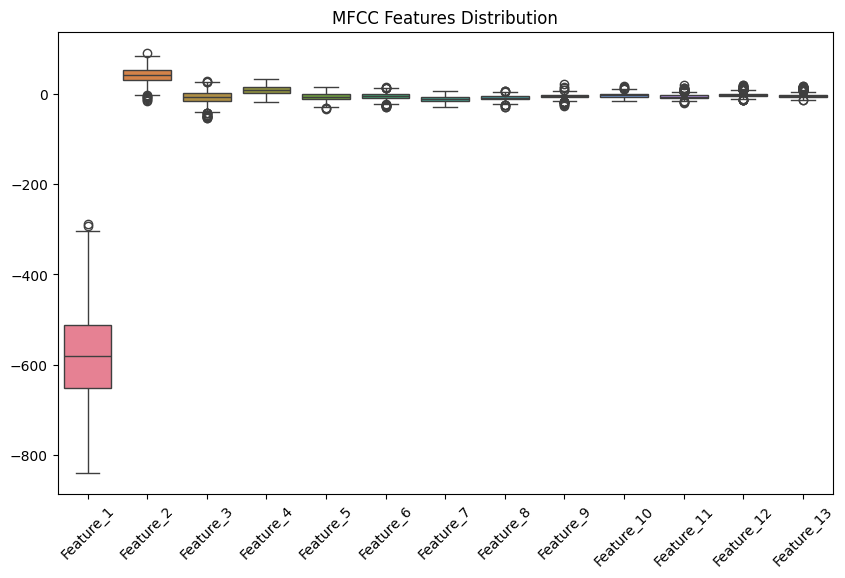

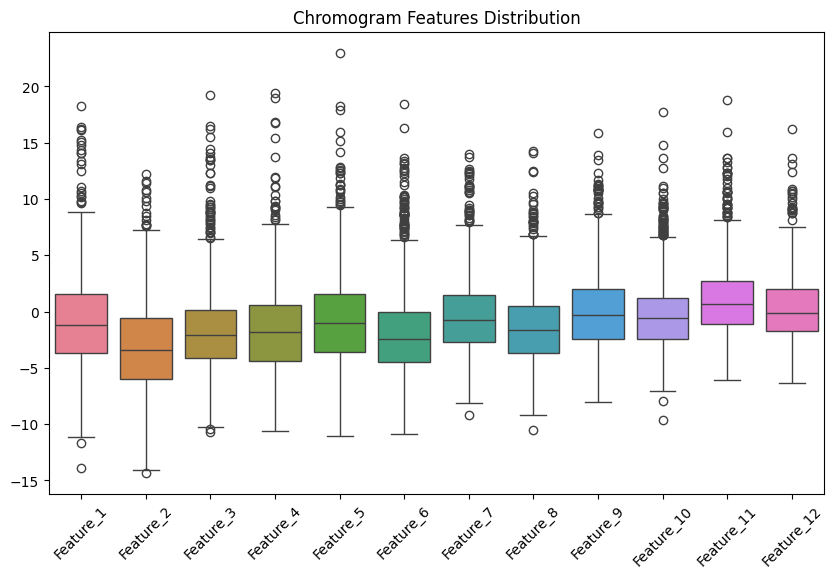

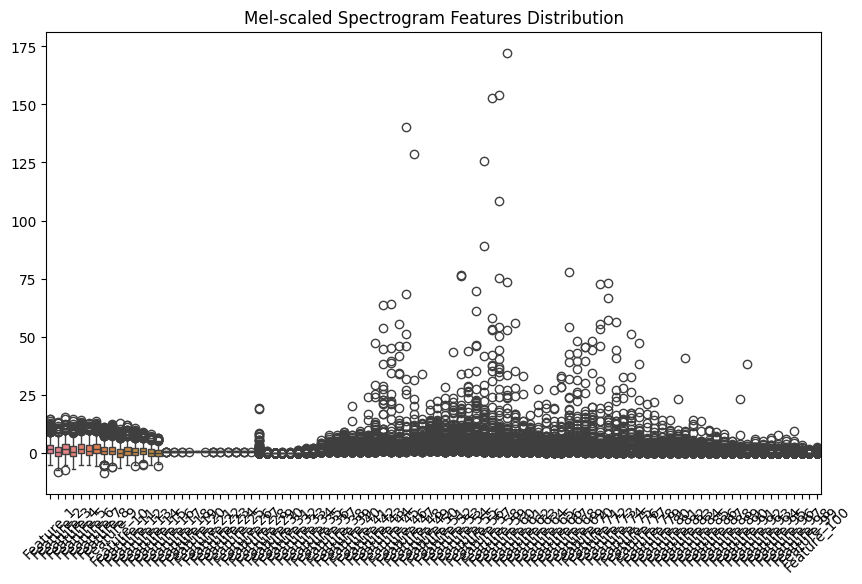

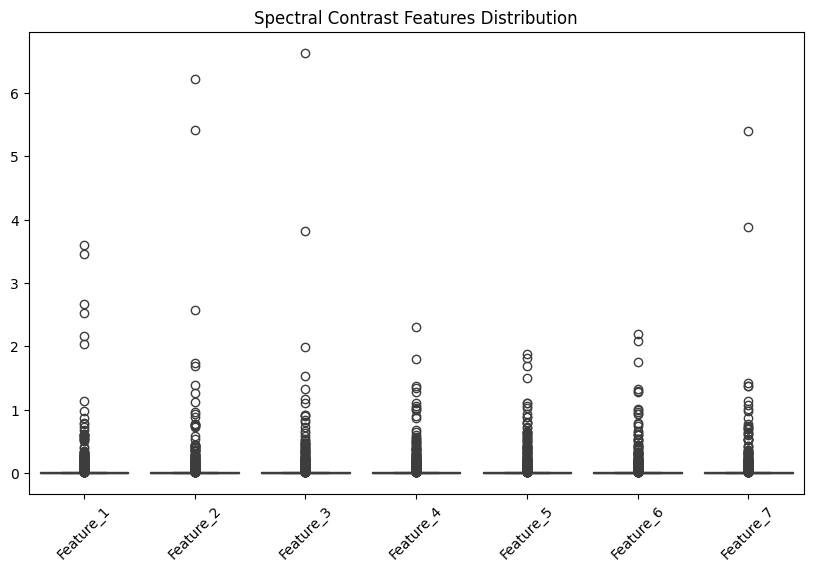

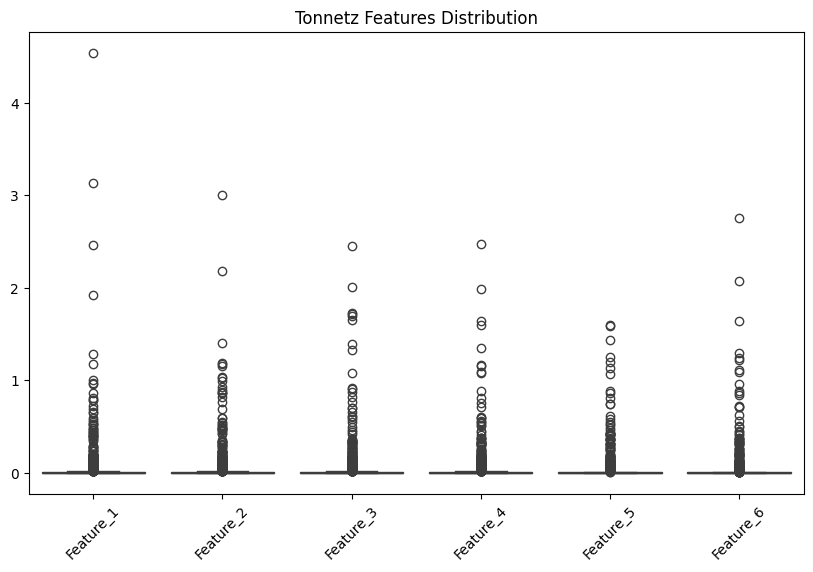

In [ ]:
# 6. Feature VisualizaƟon
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming features have been extracted in separate arrays for each type
# Example: MFCC (13 features), Chromogram (12 features), Mel-scaled spectrogram (100 features),
# Spectral contrast (7 features), and Tonnetz (6 features)

def visualize_features(features, labels, title, feature_count):
    # Convert the features into a DataFrame for easier visualization
    df = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(feature_count)])

    # Add the labels to the DataFrame
    df['label'] = labels

    # Visualize the first few samples for simplicity
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.drop('label', axis=1))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Example visualizations for each feature set:
# Assuming the first few columns of the 'features' array represent the MFCC, Chromogram, etc.

# MFCC (13 features)
mfcc_features = features[:, :13]
visualize_features(mfcc_features, labels, "MFCC Features Distribution", 13)

# Chromogram (12 features)
chromogram_features = features[:, 13:25]  # Assuming these are the next 12 features
visualize_features(chromogram_features, labels, "Chromogram Features Distribution", 12)

# Mel-scaled spectrogram (100 features)
mel_spectrogram_features = features[:, 25:125]  # Assuming these are the next 100 features
visualize_features(mel_spectrogram_features, labels, "Mel-scaled Spectrogram Features Distribution", 100)

# Spectral contrast (7 features)
spectral_contrast_features = features[:, 125:132]  # Assuming these are the next 7 features
visualize_features(spectral_contrast_features, labels, "Spectral Contrast Features Distribution", 7)

# Tonnetz (6 features)
tonnetz_features = features[:, 132:138]  # Assuming these are the next 6 features
visualize_features(tonnetz_features, labels, "Tonnetz Features Distribution", 6)


In [ ]:
# 7. Encoding Labels and Standardizing Features
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd

# Assuming 'features' is a NumPy array containing your feature data
# and 'labels' is a list or array of emotion labels (as strings)

# Step 1: Label Encoding
label_encoder = LabelEncoder()

# Fit the label encoder on the emotion labels and transform them into numerical values
encoded_labels = label_encoder.fit_transform(labels)

# You can also print the mapping of labels to encoded values for verification
print("Label Encoding Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Step 2: Standardizing Features
scaler = StandardScaler()

# Fit the scaler on the features and transform them
standardized_features = scaler.fit_transform(features)

# Convert the standardized features and encoded labels into a DataFrame for convenience (optional)
df = pd.DataFrame(standardized_features, columns=[f'Feature_{i+1}' for i in range(standardized_features.shape[1])])
df['label'] = encoded_labels

# Display the first few rows of the standardized dataset
print(df.head())


Label Encoding Mapping:
Angry -> 0
Calm -> 1
Disgust -> 2
Fearful -> 3
Happy -> 4
Neutral -> 5
Sad -> 6
Surprised -> 7
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.169918   0.435454   0.577993   0.597297   1.006973   0.292546   
1  -1.069175   0.364053   0.398941   1.141945   0.848670   0.542358   
2  -1.014203   0.516769   0.531858   0.594112   0.709403   0.622818   
3  -0.976597   0.472891   0.681758   0.593414   0.976026   0.884370   
4  -1.324351   0.779955   0.744496   0.825413   1.007947   0.495654   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_185  Feature_186  \
0   1.060948  -0.469367  -0.686981    0.856925  ...    -1.349812    -0.718359   
1   0.945353  -0.787495  -0.292330    0.933233  ...    -1.866278    -0.709672   
2   0.729794  -0.475191  -0.756873    0.763175  ...    -1.843991    -0.792144   
3   0.528885  -0.606327  -0.640969    0.852678  ...    -1.568150    -1.417331   
4   0.784869  -0.135190  -1.053488    0.877068  .

In [ ]:
# 8. Building the MLP Model

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split the dataset into training and testing sets
# Assuming 'standardized_features' and 'encoded_labels' from previous steps
X_train, X_test, y_train, y_test = train_test_split(standardized_features, encoded_labels, test_size=0.2, random_state=42)

# Step 2: Construct the MLPClassifier
# You can adjust the hidden_layer_sizes, activation, and other parameters as needed
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, activation='relu', solver='adam', random_state=42)

# Step 3: Train the model
mlp.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = mlp.predict(X_test)

# Step 5: Print the evaluation metrics
print("MLP Model Accuracy:", accuracy_score(y_test, y_pred))

# Generate a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


MLP Model Accuracy: 0.6180555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72        42
           1       0.73      0.73      0.73        44
           2       0.52      0.72      0.61        32
           3       0.67      0.75      0.71        32
           4       0.43      0.53      0.47        34
           5       0.40      0.40      0.40        20
           6       0.57      0.51      0.54        39
           7       0.86      0.53      0.66        45

    accuracy                           0.62       288
   macro avg       0.61      0.61      0.60       288
weighted avg       0.64      0.62      0.62       288



In [ ]:
# 9. Fine-Tuning Hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Define the hyperparameter space
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (100, 50), (150, 100, 50)],  # Different layer configurations
    'activation': ['relu', 'tanh', 'logistic'],  # Different activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Different solvers/optimizers
    'alpha': np.logspace(-4, 0, 5),  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'max_iter': [200, 300, 400, 500]  # Number of iterations
}

# Step 2: Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try (adjust based on time/resources)
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Verbosity level for more detailed output
    random_state=42,
    n_jobs=-1  # Use all available cores for parallel computation
)

# Step 4: Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Step 5: Print the best hyperparameters and evaluate the best model on the test set
print("Best Hyperparameters found:", random_search.best_params_)

# Get the best estimator
best_mlp = random_search.best_estimator_

# Step 6: Evaluate the best model on the test data
y_pred_best = best_mlp.predict(X_test)

# Print evaluation metrics
print("Best MLP Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters found: {'solver': 'lbfgs', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 1.0, 'activation': 'logistic'}
Best MLP Model Accuracy: 0.6041666666666666
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.81      0.69      0.74        42
           1       0.61      0.70      0.65        44
           2       0.49      0.72      0.58        32
           3       0.61      0.59      0.60        32
           4       0.49      0.56      0.52        34
           5       0.44      0.35      0.39        20
           6       0.57      0.54      0.55        39
           7       0.81      0.56      0.66        45

    accuracy                           0.60       288
   macro avg       0.60      0.59      0.59       288
weighted avg       0.62      0.60      0.61       288



C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the hyperparameter space
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (150, 100, 50), (200,)],  # Expanded configurations
    'activation': ['relu', 'tanh', 'logistic', 'identity'],  # Added activation function
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': np.logspace(-5, 0, 6),  # Broader regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 400, 500],
    'early_stopping': [True],  # Enable early stopping
    'validation_fraction': [0.1],  # Fraction for validation set
    'n_iter_no_change': [10]  # Early stopping patience
}

# Step 3: Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Step 4: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=24,  # Increased number of parameter combinations
    cv=5,  # 5-fold cross-validation for better robustness
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 5: Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Step 6: Print the best hyperparameters and evaluate the best model on the test set
print("Best Hyperparameters found:", random_search.best_params_)

# Get the best estimator
best_mlp = random_search.best_estimator_

# Step 7: Evaluate the best model on the test data
y_pred_best = best_mlp.predict(X_test_scaled)

# Print evaluation metrics
print("Best MLP Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters found: {'validation_fraction': 0.1, 'solver': 'lbfgs', 'n_iter_no_change': 10, 'max_iter': 400, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'early_stopping': True, 'alpha': 1.0, 'activation': 'relu'}
Best MLP Model Accuracy: 0.6388888888888888
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        42
           1       0.65      0.73      0.69        44
           2       0.51      0.81      0.63        32
           3       0.68      0.66      0.67        32
           4       0.56      0.59      0.57        34
           5       0.53      0.45      0.49        20
           6       0.62      0.59      0.61        39
           7       0.76      0.58      0.66        45

    accuracy                           0.64       288
   macro avg       0.64      0.63      0.63       288
weighted avg       0.66

C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# 10 Make Predictions

from sklearn.metrics import classification_report, accuracy_score

# Assuming the following from previous steps:
# 1. 'mlp' is the basic model (before tuning)
# 2. 'best_mlp' is the optimized model from RandomizedSearchCV
# 3. 'X_test' and 'y_test' are the test set features and labels

# Step 1: Train the basic MLP model (if not already trained)
# You can skip this if 'mlp' is already trained
mlp.fit(X_train, y_train)

# Step 2: Make predictions using the basic model
y_pred_basic = mlp.predict(X_test)

# Step 3: Make predictions using the optimized model (already trained with best hyperparameters)
y_pred_optimized = best_mlp.predict(X_test)

# Step 4: Evaluate the basic model
print("Basic MLP Model Accuracy:", accuracy_score(y_test, y_pred_basic))
print("Classification Report for Basic Model:\n", classification_report(y_test, y_pred_basic))

# Step 5: Evaluate the optimized model
print("\nOptimized MLP Model Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report for Optimized Model:\n", classification_report(y_test, y_pred_optimized))


Basic MLP Model Accuracy: 0.6111111111111112
Classification Report for Basic Model:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        42
           1       0.63      0.73      0.67        44
           2       0.53      0.78      0.63        32
           3       0.62      0.62      0.62        32
           4       0.47      0.56      0.51        34
           5       0.40      0.30      0.34        20
           6       0.56      0.49      0.52        39
           7       0.84      0.58      0.68        45

    accuracy                           0.61       288
   macro avg       0.60      0.59      0.59       288
weighted avg       0.63      0.61      0.61       288


Optimized MLP Model Accuracy: 0.65625
Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.65      0.73      0.69        44
           2      

C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=== Basic Model Evaluation ===
Accuracy: 0.6111111111111112
Classification Report for Basic Model:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        42
           1       0.63      0.73      0.67        44
           2       0.53      0.78      0.63        32
           3       0.62      0.62      0.62        32
           4       0.47      0.56      0.51        34
           5       0.40      0.30      0.34        20
           6       0.56      0.49      0.52        39
           7       0.84      0.58      0.68        45

    accuracy                           0.61       288
   macro avg       0.60      0.59      0.59       288
weighted avg       0.63      0.61      0.61       288



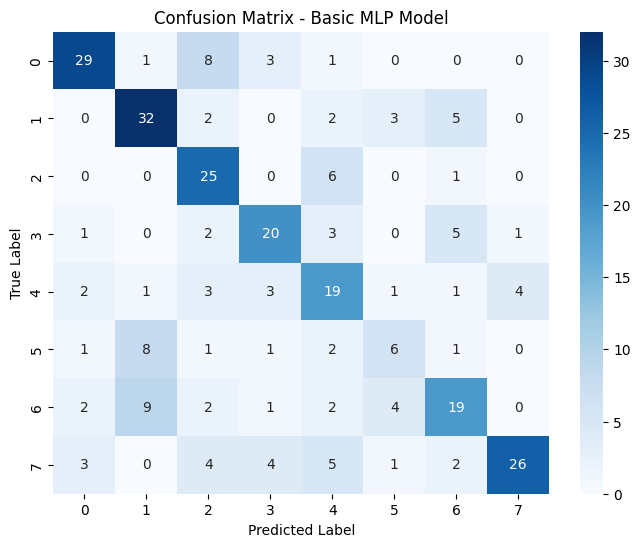


=== Optimized Model Evaluation ===
Accuracy: 0.65625
Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.65      0.73      0.69        44
           2       0.50      0.84      0.63        32
           3       0.68      0.66      0.67        32
           4       0.59      0.59      0.59        34
           5       0.62      0.40      0.48        20
           6       0.64      0.64      0.64        39
           7       0.81      0.64      0.72        45

    accuracy                           0.66       288
   macro avg       0.67      0.64      0.64       288
weighted avg       0.68      0.66      0.66       288



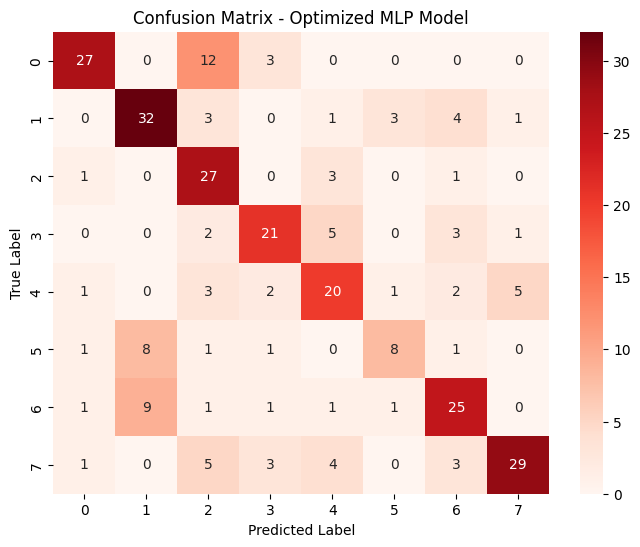

In [ ]:
# 11. Analysing Different Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the following from previous steps:
# 1. 'y_pred_basic' contains predictions from the basic model
# 2. 'y_pred_optimized' contains predictions from the optimized model
# 3. 'y_test' contains the true labels

# Step 1: Analyze performance for the Basic Model
print("=== Basic Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_basic))
print("Classification Report for Basic Model:\n", classification_report(y_test, y_pred_basic))

# Step 2: Confusion Matrix for Basic Model
conf_matrix_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_basic, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Basic MLP Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 3: Analyze performance for the Optimized Model
print("\n=== Optimized Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report for Optimized Model:\n", classification_report(y_test, y_pred_optimized))

# Step 4: Confusion Matrix for Optimized Model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Optimized MLP Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# 12. ImplemenƟng K-Fold Cross-ValidaƟon Techniques
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import numpy as np

# Step 1: Set up K-fold cross-validation
k = 5  # You can set k to 5 or 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Step 2: Define scoring metrics
# We can use multiple metrics if desired
scoring = {'accuracy': make_scorer(accuracy_score), 'f1_weighted': make_scorer(f1_score, average='weighted')}

# Step 3: Perform K-fold cross-validation for the basic model
print("=== K-Fold Cross-Validation for Basic Model ===")
basic_cv_scores_accuracy = cross_val_score(mlp, X_train, y_train, cv=kf, scoring='accuracy')
basic_cv_scores_f1 = cross_val_score(mlp, X_train, y_train, cv=kf, scoring='f1_weighted')

# Step 4: Perform K-fold cross-validation for the optimized model
print("\n=== K-Fold Cross-Validation for Optimized Model ===")
optimized_cv_scores_accuracy = cross_val_score(best_mlp, X_train, y_train, cv=kf, scoring='accuracy')
optimized_cv_scores_f1 = cross_val_score(best_mlp, X_train, y_train, cv=kf, scoring='f1_weighted')

# Step 5: Display results

# Basic Model Evaluation
print("\nBasic Model K-Fold Accuracy Scores:", basic_cv_scores_accuracy)
print("Basic Model K-Fold Average Accuracy:", np.mean(basic_cv_scores_accuracy))
print("Basic Model K-Fold F1 Scores:", basic_cv_scores_f1)
print("Basic Model K-Fold Average F1 Score:", np.mean(basic_cv_scores_f1))

# Optimized Model Evaluation
print("\nOptimized Model K-Fold Accuracy Scores:", optimized_cv_scores_accuracy)
print("Optimized Model K-Fold Average Accuracy:", np.mean(optimized_cv_scores_accuracy))
print("Optimized Model K-Fold F1 Scores:", optimized_cv_scores_f1)
print("Optimized Model K-Fold Average F1 Score:", np.mean(optimized_cv_scores_f1))


=== K-Fold Cross-Validation for Basic Model ===


C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye


=== K-Fold Cross-Validation for Optimized Model ===


C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: Convergenc


Basic Model K-Fold Accuracy Scores: [0.62337662 0.61471861 0.65652174 0.58695652 0.51304348]
Basic Model K-Fold Average Accuracy: 0.5989233954451346
Basic Model K-Fold F1 Scores: [0.62219488 0.60854385 0.65565047 0.5837869  0.51763935]
Basic Model K-Fold Average F1 Score: 0.5975630913245908

Optimized Model K-Fold Accuracy Scores: [0.67099567 0.62337662 0.6826087  0.63043478 0.58695652]
Optimized Model K-Fold Average Accuracy: 0.6388744588744589
Optimized Model K-Fold F1 Scores: [0.6669412  0.61439762 0.68417388 0.62738284 0.58914834]
Optimized Model K-Fold Average F1 Score: 0.6364087752126505


C:\Users\SHREYAS S\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Initialize the models
svm_model = SVC(random_state=42)  # Support Vector Machine
knn_model = KNeighborsClassifier()  # K-Nearest Neighbors

# Step 2: Set up K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Step 3: Evaluate SVM Model using K-Fold Cross-Validation
print("=== K-Fold Cross-Validation for SVM Model ===")
svm_cv_scores_accuracy = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')
svm_cv_scores_f1 = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='f1_weighted')

# Step 4: Evaluate KNN Model using K-Fold Cross-Validation
print("\n=== K-Fold Cross-Validation for KNN Model ===")
knn_cv_scores_accuracy = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='accuracy')
knn_cv_scores_f1 = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1_weighted')

# Step 5: Display results for SVM
print("\nSVM Model K-Fold Accuracy Scores:", svm_cv_scores_accuracy)
print("SVM Model K-Fold Average Accuracy:", np.mean(svm_cv_scores_accuracy))
print("SVM Model K-Fold F1 Scores:", svm_cv_scores_f1)
print("SVM Model K-Fold Average F1 Score:", np.mean(svm_cv_scores_f1))

# Step 6: Display results for KNN
print("\nKNN Model K-Fold Accuracy Scores:", knn_cv_scores_accuracy)
print("KNN Model K-Fold Average Accuracy:", np.mean(knn_cv_scores_accuracy))
print("KNN Model K-Fold F1 Scores:", knn_cv_scores_f1)
print("KNN Model K-Fold Average F1 Score:", np.mean(knn_cv_scores_f1))

# Step 7: Summarize findings
print("\n=== Comparative Analysis ===")
print("1. Basic MLP Model Average Accuracy:", np.mean(basic_cv_scores_accuracy))
print("1. Basic MLP Model Average F1 Score:", np.mean(basic_cv_scores_f1))

print("2. Optimized MLP Model Average Accuracy:", np.mean(optimized_cv_scores_accuracy))
print("2. Optimized MLP Model Average F1 Score:", np.mean(optimized_cv_scores_f1))

print("3. SVM Model Average Accuracy:", np.mean(svm_cv_scores_accuracy))
print("3. SVM Model Average F1 Score:", np.mean(svm_cv_scores_f1))

print("4. KNN Model Average Accuracy:", np.mean(knn_cv_scores_accuracy))
print("4. KNN Model Average F1 Score:", np.mean(knn_cv_scores_f1))


=== K-Fold Cross-Validation for SVM Model ===

=== K-Fold Cross-Validation for KNN Model ===

SVM Model K-Fold Accuracy Scores: [0.91666667 1.         1.         0.875      1.        ]
SVM Model K-Fold Average Accuracy: 0.9583333333333333
SVM Model K-Fold F1 Scores: [0.91944444 1.         1.         0.87412281 1.        ]
SVM Model K-Fold Average F1 Score: 0.9587134502923977

KNN Model K-Fold Accuracy Scores: [0.91666667 0.95833333 0.95833333 0.91666667 1.        ]
KNN Model K-Fold Average Accuracy: 0.95
KNN Model K-Fold F1 Scores: [0.91944444 0.95846233 0.95925926 0.91666667 1.        ]
KNN Model K-Fold Average F1 Score: 0.9507665405343424

=== Comparative Analysis ===
1. Basic MLP Model Average Accuracy: 0.5989233954451346
1. Basic MLP Model Average F1 Score: 0.5975630913245908
2. Optimized MLP Model Average Accuracy: 0.6388744588744589
2. Optimized MLP Model Average F1 Score: 0.6364087752126505
3. SVM Model Average Accuracy: 0.9583333333333333
3. SVM Model Average F1 Score: 0.958713

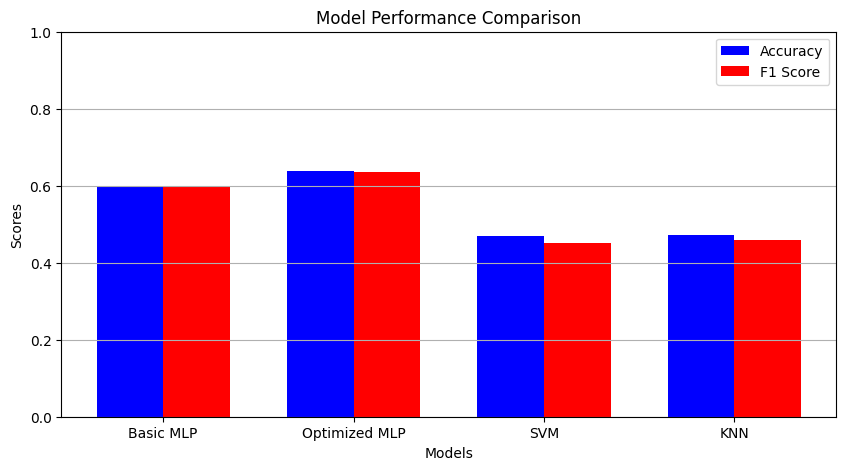

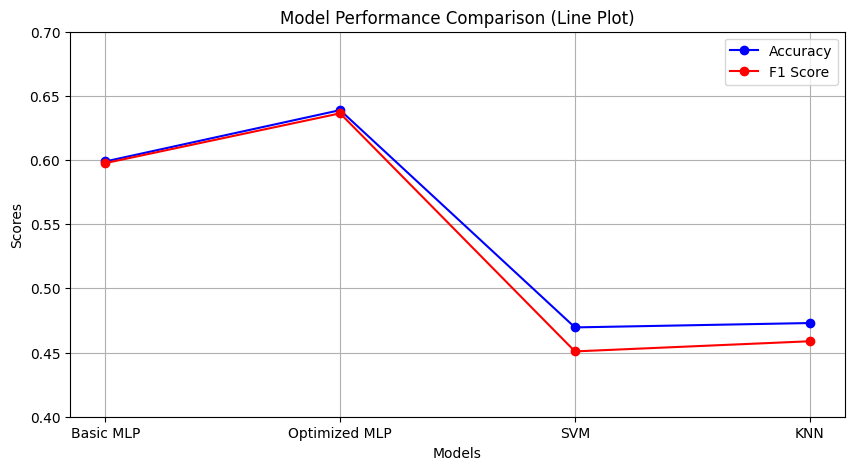

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and values
models = ['Basic MLP', 'Optimized MLP', 'SVM', 'KNN']
accuracy_values = [0.5989, 0.6389, 0.4696, 0.4730]
f1_values = [0.5976, 0.6364, 0.4509, 0.4588]

# Bar Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(models))

# Create bars for accuracy and F1 Score
plt.bar(index, accuracy_values, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, f1_values, bar_width, label='F1 Score', color='red')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(models, accuracy_values, marker='o', label='Accuracy', color='blue')
plt.plot(models, f1_values, marker='o', label='F1 Score', color='red')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison (Line Plot)')
plt.legend()
plt.ylim(0.4, 0.7)
plt.grid()
plt.show()
